In [1]:
import requests as rq

In [2]:
url = 'https://ko.wikipedia.org/wiki/파이선'

res = rq.get(url)

# text : HTML 코드 전부를 return
# text 속성은 한글 encoding issue가 생길 수 있음
print(res.text)

<!DOCTYPE html>
<html class="client-nojs" lang="ko" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>파이선 - 위키백과, 우리 모두의 백과사전</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"ko","wgMonthNames":["","1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"],"wgRequestId":"5af7cb97-79e1-4b04-9a4e-d927b8065cdb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"파이선","wgTitle":"파이선","wgCurRevisionId":26624293,"wgRevisionId":26624293,"wgArticleId":594513,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["위키낱말사전과 연결된 문서","모든 동음이의어 문서","동음이의어 문서"],"wgPageContentLanguage":"ko","wgPageContentModel":"wikitext","wgRelevantPageName":"파이선","wgRelevantArticleId":594513,"wgIsProbablyEditable":!0,"wgRelevantPageIsProbablyEditable":!0,"wgRestrictionEdit"

In [3]:
# content 속성 : 한글을 바이너리 형태로 return
#              : 코드화 시켜서 return
#              : 이 속성으로 작업하는 것을 더 권장
print(res.content)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="ko" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>\xed\x8c\x8c\xec\x9d\xb4\xec\x84\xa0 - \xec\x9c\x84\xed\x82\xa4\xeb\xb0\xb1\xea\xb3\xbc, \xec\x9a\xb0\xeb\xa6\xac \xeb\xaa\xa8\xeb\x91\x90\xec\x9d\x98 \xeb\xb0\xb1\xea\xb3\xbc\xec\x82\xac\xec\xa0\x84</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"ko","wgMonthNames":["","1\xec\x9b\x94","2\xec\x9b\x94","3\xec\x9b\x94","4\xec\x9b\x94","5\xec\x9b\x94","6\xec\x9b\x94","7\xec\x9b\x94","8\xec\x9b\x94","9\xec\x9b\x94","10\xec\x9b\x94","11\xec\x9b\x94","12\xec\x9b\x94"],"wgRequestId":"5af7cb97-79e1-4b04-9a4e-d927b8065cdb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"\xed\x8c\x8c\xec\x9d\xb4\xec\x84\xa0","wgTitle":"\xed\x8c\x8c\xec\x9d\xb4\xec\x84\xa0","wgCurRevisionId":26624293,"wgRevisionId":

In [4]:
# 인코딩 확인
print(res.encoding)  # meta 속성부분 읽어서 return

UTF-8


In [5]:
# 주소창 parameter 처리 : 데이터 보내기
# 1) 직접 접근 가능
url = 'https://ko.wikipedia.org/wiki/파이선?key1=value1&key2=value2'

res = rq.get(url)

print(res)
print(res.url)

<Response [200]>
https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%EC%84%A0?key1=value1&key2=value2


In [8]:
# 2) params 속성을 통한 접근
url = 'https://ko.wikipedia.org/wiki/파이선'

res = rq.get(url, params={'key1':'value1', 'key2':'value2'})

print(res)
print(res.url)

<Response [200]>
https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%EC%84%A0?key1=value1&key2=value2


In [11]:
# 3) json을 통한 접근
import json

url = 'http://example.com'
# json은 키:값 의 형태인데 이게 파이선에는 딕셔너리로 이미 있음
res = rq.post(url, data=json.dumps({"key1":"value1", "key2":"value2"}))

print(res)
print(res.url)

<Response [200]>
http://example.com/


In [14]:
dict1 = {'key1':'value1', 'key2':'value2'}
dict2 = {"key1":"value1", "key2":"value2"}

print(str(dict1))         # 작은 따옴표로
print(json.dumps(dict1))  # 쌍따옴표로

# 파이선은 따옴표를 붙이기만 하면 문자열이나 다른 언어에서 대부분 쌍따옴표가 문자열
# ==> 호환성을 위해 json을 dict보다 권장

print('------------------------------------')
print(str(dict2))
print(json.dumps(dict2))

'''
딕셔너리 형태로 유지되면서 문자열로 바꾸는 결과는 큰따옴표로 결과값이 나와야 함
일반 문자열로 표현되는 결과(str())는 작은 따옴표로 나오므로 에러가 발생할 수 있음
그래서 언제나 큰 따옴표로 나오는 json을 권장
'''

{'key1': 'value1', 'key2': 'value2'}
{"key1": "value1", "key2": "value2"}
------------------------------------
{'key1': 'value1', 'key2': 'value2'}
{"key1": "value1", "key2": "value2"}


In [17]:
# 에러
# url에 http 또는 https를 명시하지 않으면 에러가 발생
url = 'ko.wikipedia.org/wiki/파이선'  

res = rq.get(url)

print(res)



MissingSchema: Invalid URL 'ko.wikipedia.org/wiki/파이선': No schema supplied. Perhaps you meant http://ko.wikipedia.org/wiki/파이선?

In [19]:
url = 'ko.wikipedia.org/wiki/파이선'  

try:
    res = rq.get(url)
    print(res)
except rq.exceptions.MissingSchema:  # requests의 exceptions 객체
    print('MissingSchema error 발생')

MissingSchema error 발생


In [25]:
# urllib module
from urllib.request import urlopen, Request

url = 'https://www.naver.com'

# urllib를 통해 객체를 만들어 요청
req = Request(url)
print(req)
print('---------------------------------------------------------')
# 만들어진 객체를 통해 url 접근(요청)
page = urlopen(req)

print(page)

print('---------------------------------------------------------')
print(page.code)
print(page.headers) # 보기 편하게 보내줌
print(page.url)
print(page.info().get_content_charset())

---------------------------------------------------------
---------------------------------------------------------
200
Server: NWS
Date: Wed, 21 Apr 2021 03:52:56 GMT
Content-Type: text/html; charset=UTF-8
Transfer-Encoding: chunked
Connection: close
Set-Cookie: PM_CK_loc=c58d37be9e829071398fb43995737a428a5e9710a14afb01ce8cf9e2c5bbc785; Expires=Thu, 22 Apr 2021 03:52:56 GMT; Path=/; HttpOnly
Cache-Control: no-cache, no-store, must-revalidate
Pragma: no-cache
P3P: CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"
X-Frame-Options: DENY
X-XSS-Protection: 1; mode=block
Strict-Transport-Security: max-age=63072000; includeSubdomains
Referrer-Policy: unsafe-url


https://www.naver.com
utf-8


b'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb
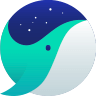
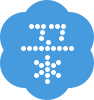

In [26]:
page.read() # urllib 모듈은 read()를 통해 binary 데이터읽어옴

In [27]:
import urllib

In [28]:
url = 'http://example.com'

# post 방식 요청 시 보낼 데이터는 바이너리 형태로 인코딩해서 보내야 함
data = {"key1":"value1","key2":"value2"}
data = urllib.parse.urlencode(data)  # 데이터를 바이너리로 파싱
data = data.encode('utf-8')

print(data) # 바이너리 코드된 문자열

b'key1=value1&key2=value2'


In [31]:
# post 요청

# Request 객체 이용시 두 번째 인자가 있으면 post로 인식, 없으면 get | 세 번째 인자는 headers
req_post = Request(url, data=data, headers={})

page = urlopen(req_post)

print(page)
print(page.url)

http://example.com


In [34]:
# get 요청
# 두 번쨰 인자 없다 표시 : None
req_get = Request(url+"?key1=value1&key2=value2", None, headers={})
page = urlopen(req_get)

print(page)
print(page.url)

http://example.com?key1=value1&key2=value2


In [35]:
# urllib 로 잘못된 주소 찾을 경우
url = 'http://example.com/a'

req_post = Request(url)
page = urlopen(req_post)

print(page)
print(page.url)   # HTTPError 에러 발생

HTTPError: HTTP Error 404: Not Found

In [37]:
# requests 로 잘못된 주소 찾을 경우
url = 'http://example.com/a'
res = rq.post(url)

print(res.status_code)

404


In [ ]:
'''
requests 와 urllib
1. url을 통한 요청 시 요청 객체를 생성하는 방법에 차이 있음
    requests는 함수로, urllib는 객체를 만들고 함수로
2. 데이터 전송 시 requests는 딕셔너리, urllib는 인코딩하여 바이너리 형태로 전송(권장)
3. requests를 통한 요청 형태는 (get, post)를 명확이 적시
   urllib를 통한 요청 형태는 Request() 안의 인자 여부로(두 번째 인자의 유무)
4. 페이지 주소의 오류가 있을 경우 urllib는 다 에러를 발생시키고 에러코드를 띄워줌
   requests는 404
'''